# Regularization

## 1 Explain what is Regularization? 

*Regularisation is used so that our model is not overfitted. It just adds an extra penalty in terms of some constant in the error function. So it is basically used
to generalize our model for all the datasets. *


## 2 Explain how regularization is performed in linear regression? 

*Our aim for the model is that our loss function should be minimized. We add an additional penalty in the loss function to make it generalize.
The formula is L2= Sum(y'-y)**2 + l*w^2  or L1=Sum(y'-y)**2 + l*|w| . The last term addes the penalty. So every time our function tries to deviate we are trying to reduce 
it using this penalty.*

## 3 Explain what is Ridge and Lasso regression? 

*In above formulas the former one is Ridge and latter one is Lasso. They both includes the penalty in their equation with different proportions*

Lasso Regression:
It is L1 regularization. The penalty is the absolute value of the co-efficients.

Ridge Regresssion:
It is L2 Regualarization. It adds penalty in terms of square of magnitude of co-efficients.*

## 4 Perform Ridge and Lasso regression continuing the task of the previous homework

> Indented block



In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets
from sklearn.datasets import load_boston

In [2]:
housing= datasets.load_boston()
bost= pd.DataFrame(housing.data,columns=housing.feature_names)
bost['PRICE'] = pd.Series(data=housing.target, index=bost.index)
#bost[['RM','LSTAT','PRICE']]
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
X=bost.iloc[:,:-1]
Y=bost.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state=11)

# min max scaling the variables
scaler =  RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Lasso regression
lasso_reg=Lasso(alpha=0.00034,max_iter=80,tol=0.2)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)
#y_pred1 = lasso_reg.predict(X_test_scaled)

0.6614395801653503

In [9]:
#Ridge regression
ridge_reg=Ridge(alpha=0.1,max_iter=80,tol=0.2)
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)
#y_pred2 = ridge_reg.predict(X_test_scaled)

0.6849222984686425

## 5 Perform Ridge and Lasso regression on HCC.csv dataset after performing necessary pre-processing steps as mentioned in the previous homework

In [4]:
df=pd.read_csv("HCC.csv")
df.head()

,Unnamed: 0,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
0,0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,...,2.1,34.0,41,183.0,150.0,7.1,0.70,1.0,3.5,1
1,2,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.4,58.0,68,202.0,109.0,7.0,2.10,5.0,13.0,1
2,3,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,...,0.4,16.0,64,94.0,174.0,8.1,1.11,2.0,15.7,0
3,4,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.7,147.0,306,173.0,109.0,6.9,1.80,1.0,9.0,1
4,5,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,...,3.5,91.0,122,242.0,396.0,5.6,0.90,1.0,10.0,0


In [5]:
df=df.iloc[:,1:]

<AxesSubplot:>

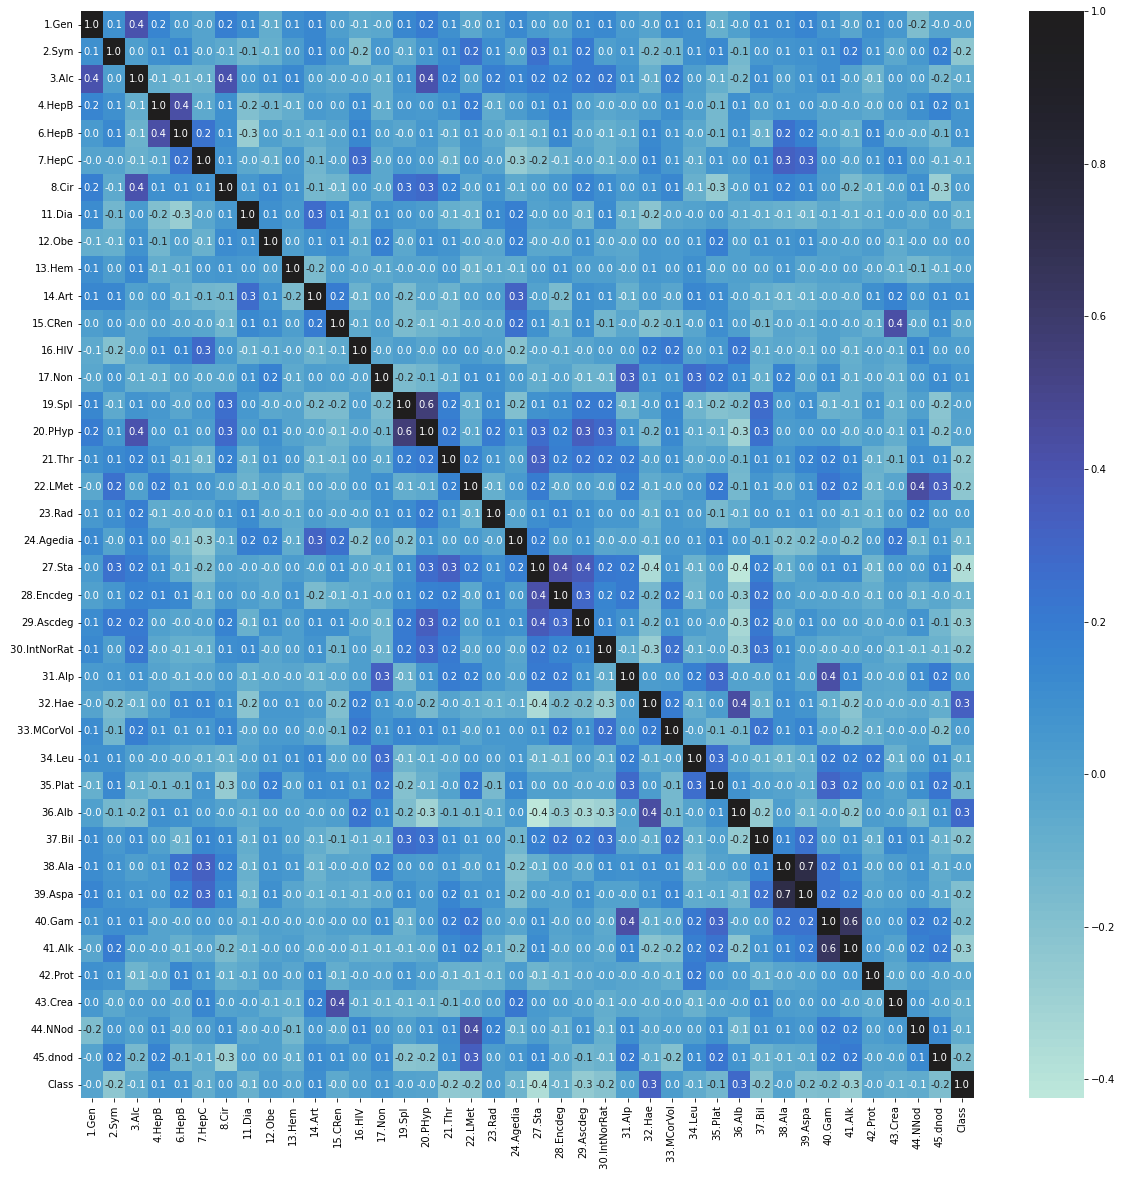

In [15]:
import seaborn as sns

correlation_matrix=df.corr().round(5)
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation_matrix,annot=True,fmt = '0.1f',linecolor='black',cbar=True,center=1)

In [32]:
#Here those features are selected which have high co-relation value

limit=0.15
count=len(correlation_matrix)-1
df2=pd.DataFrame()
for j in range(count):
    if(abs(correlation_matrix.iloc[j,count])>limit):
       print(correlation_matrix.iloc[j,count],correlation_matrix.columns[j],j)
       df2[correlation_matrix.columns[j]]=df.iloc[:,j:j+1]
df2.head()

-0.22453 2.Sym 1
-0.24598 21.Thr 16
-0.22864 22.LMet 17
-0.36738 27.Sta 20
-0.25616 29.Ascdeg 22
-0.20314  30.IntNorRat 23
0.33059  32.Hae 25
0.28655 36.Alb 29
-0.21277 37.Bil 30
-0.191 39.Aspa 32
-0.17257 40.Gam 33
-0.26906 41.Alk 34
-0.17329 45.dnod 38


,2.Sym,21.Thr,22.LMet,27.Sta,29.Ascdeg,30.IntNorRat,32.Hae,36.Alb,37.Bil,39.Aspa,40.Gam,41.Alk,45.dnod
0,0.0,0.0,0.0,0,1.0,1.53,13.7,3.4,2.1,41,183.0,150.0,3.5
1,0.0,0.0,1.0,2,2.0,0.96,8.9,3.3,0.4,68,202.0,109.0,13.0
2,1.0,0.0,1.0,0,1.0,0.95,13.4,3.7,0.4,64,94.0,174.0,15.7
3,1.0,0.0,0.0,0,1.0,0.94,14.3,4.1,0.7,306,173.0,109.0,9.0
4,0.0,0.0,0.0,1,2.0,1.58,13.4,3.4,3.5,122,242.0,396.0,10.0


Text(0.5, 1.0, 'Plot for alpha: 0.00034')

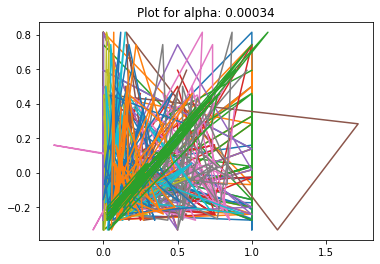

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X=df2.iloc[:,:]
Y=df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state=11)
Alpha=0.00034

# min max scaling the variables
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Lasso regression
lasso_reg=Lasso(alpha=Alpha,max_iter=80,tol=0.2)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)
y_pred1 = lasso_reg.predict(X_test_scaled)

#plotting the curve
plt.figure(figsize = (6,4))
plt.plot(X_test_scaled, y_pred1)
#plt.plot(X, Y, '.')
plt.title('Plot for alpha: %.3g'%Alpha)

In [34]:
#Ridge regression
ridge_reg=Ridge(alpha=0.1,max_iter=80,tol=0.2)
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)
#y_pred2 = ridge_reg.predict(X_test_scaled)

0.9999999964875168

In [ ]:
#plotting the curve
plt.figure(figsize = (6,4))
plt.plot(X_test_scaled, y_pred1)

